In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import HTML

,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,...,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06,Unnamed: 139,Unnamed: 140
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,328,593,582,237,80,221,315,656,NaN,NaN
Alaska,0,0,0,0,0,0,0,0,0,0,...,5,28,7,21,19,26,23,14,NaN,12312.00
Arizona,0,0,0,0,0,1,0,0,0,0,...,790,681,187,1127,995,573,1551,1148,NaN,3254.88
Arkansas,0,0,0,0,0,0,0,0,0,0,...,236,240,190,375,249,358,226,450,NaN,NaN
California,0,0,0,0,1,1,0,0,0,0,...,3057,3014,2529,2438,2326,2510,3593,2637,NaN,NaN


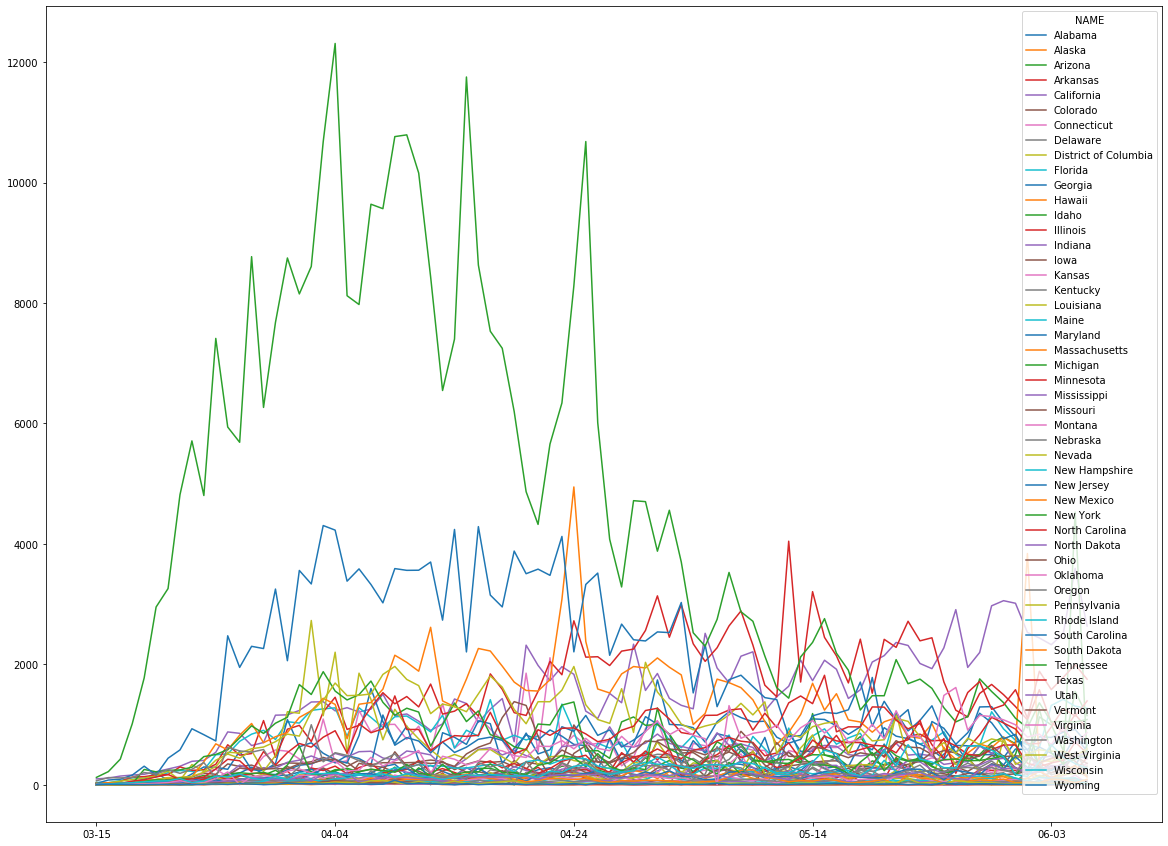

In [4]:
#Load dataset
df = pd.read_excel('NYTimes data.xlsx',sheet_name='Sheet5')
df=df.set_index('NAME')
display(df.head())
df.T.iloc[54:].plot(figsize=(20,15),legend=True)

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
81,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,"POLYGON ((-95.15332 49.19311, -95.15342 49.249..."
82,20.853578,30.717392,84,83,53,Washington,01,4,9,None,"POLYGON ((-122.29069 49.00243, -122.28565 49.0..."
83,0.001521,0.174360,85,84,53,Washington,01,4,9,None,"POLYGON ((-123.09055 49.00198, -123.06793 49.0..."
84,45.078463,34.976231,86,85,30,Montana,01,4,8,None,"POLYGON ((-116.04919 49.00091, -116.00103 49.0..."
85,24.456828,29.190335,87,86,16,Idaho,01,4,8,None,"POLYGON ((-116.04919 49.00091, -116.04918 48.8..."


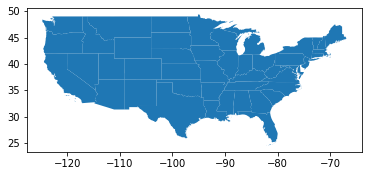

In [5]:
#load map of USA
map_df = gpd.read_file('StateMap\st99_d00.shp')

statestokeep=['Nevada', 'Arizona','New Mexico', 'Texas', 'California',
              'Utah','Colorado','Oklahoma', 'Oregon','Idaho','Wyoming',
              'Nebraska','Kansas','Washington', 'Montana','South Dakota',
              'North Dakota','Louisiana','Arkansas','Missouri','Iowa',
              'Minnesota', 'Wisconsin', 'Illinois', 'Kentucky',
              'Tennessee', 'Alabama', 'Mississippi', 'Indiana','Michigan',
              'Ohio','Georgia','Florida','South Carolina','North Carolina',
              'Virginia', 'West Virginia','Maryland','Pennsylvania',
              'New Jersey','New York','Rhode Island','Connecticut',
              'Massachusetts','Vermont','New Hampshire','Maine']
map_df = map_df[map_df['NAME'].isin(statestokeep)]
display(map_df.head())
map_df.plot()

In [6]:
#merge map and covid dataset
coviddf = map_df.merge(df,on='NAME')
coviddf.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,...,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06,Unnamed: 139,Unnamed: 140
0,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,...,659,660,358,300,363,403,707,521,NaN,NaN
1,20.853578,30.717392,84,83,53,Washington,01,4,9,None,...,238,196,458,335,164,222,545,219,NaN,NaN
2,0.001521,0.174360,85,84,53,Washington,01,4,9,None,...,238,196,458,335,164,222,545,219,NaN,NaN
3,0.002965,0.327859,89,88,53,Washington,01,4,9,None,...,238,196,458,335,164,222,545,219,NaN,NaN
4,0.001587,0.190426,90,89,53,Washington,01,4,9,None,...,238,196,458,335,164,222,545,219,NaN,NaN


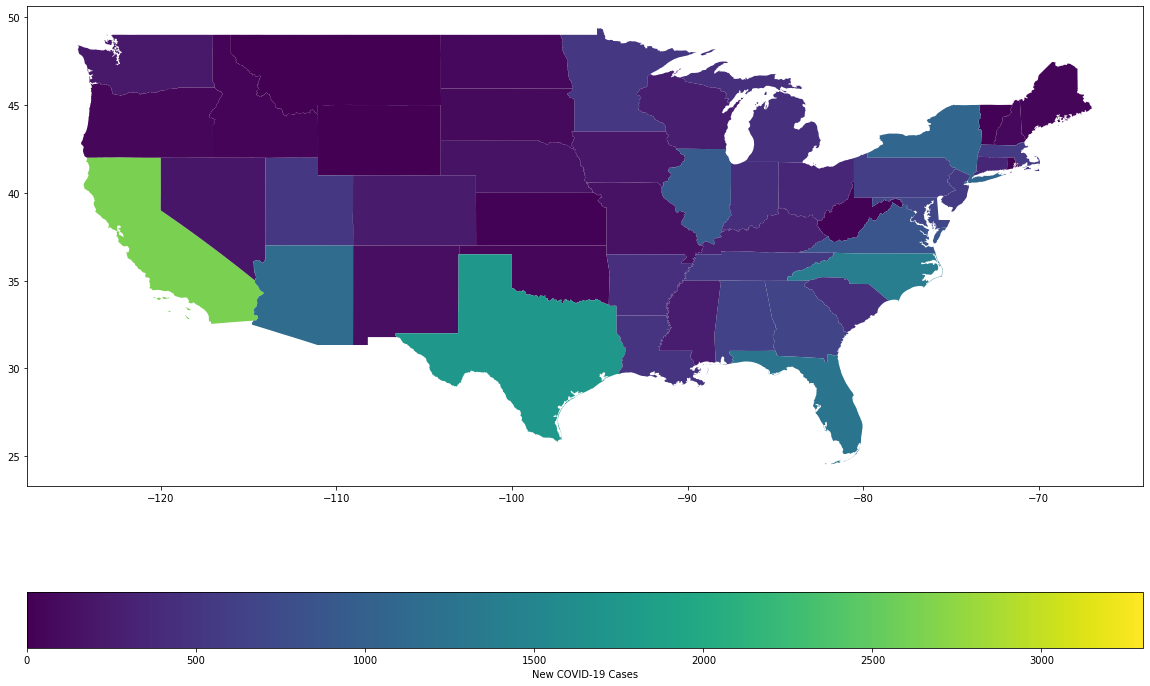

In [7]:
#practice map
fig, ax = plt.subplots(1, 1,figsize=(20, 13))
coviddf.plot(column='06-06',
             ax=ax, 
             legend=True,
             vmin=0,
             vmax=3300,
             legend_kwds={'label': "New COVID-19 Cases",
                          'orientation': "horizontal"})

In [9]:
#create and save image for each day
dates=['01-21','01-22','01-23','01-24','01-25','01-26','01-27','01-28',
'01-29','01-30','01-31','02-01','02-02','02-03','02-04','02-05',
'02-06','02-07','02-08','02-09','02-10','02-11','02-12','02-13',
'02-14','02-15','02-16','02-17','02-18','02-19','02-20','02-21',
'02-22','02-23','02-24','02-25','02-26','02-27','02-28','02-29',
'03-01','03-02','03-03','03-04','03-05','03-06','03-07','03-08',
'03-09','03-10','03-11','03-12','03-13','03-14','03-15','03-16',
'03-17','03-18','03-19','03-20','03-21','03-22','03-23','03-24',
'03-25','03-26','03-27','03-28','03-29','03-30','03-31','04-01',
'04-02','04-03','04-04','04-05','04-06','04-07','04-08','04-09',
'04-10','04-11','04-12','04-13','04-14','04-15','04-16','04-17',
'04-18','04-19','04-20','04-21','04-22','04-23','04-24','04-25',
'04-26','04-27','04-28','04-29','04-30','05-01','05-02','05-03',
'05-04','05-05','05-06','05-07','05-08','05-09','05-10','05-11',
'05-12','05-13','05-14','05-15','05-16','05-17','05-18','05-19',
'05-20','05-21','05-22','05-23','05-24','05-25','05-26','05-27',
'05-28','05-29','05-30','05-31','06-01','06-02','06-03','06-04',
'06-05','06-06']

for date in dates:
    fig, ax = plt.subplots(1, 1,figsize=(10, 10))
    coviddf.plot(column=date,
                 ax=ax,
                 legend=True,
                 vmin=0,
                 vmax=3300,
                 legend_kwds={'label': 'New COVID-19 Cases: {}'.format(date),
                              'orientation': "horizontal"})
    plt.savefig('img/{} USA COVID Cases.png'.format(date))
    plt.close()
print('Done')

Done


In [88]:
#create gif
images = []
for date in dates:
    frame = Image.open('img/{} USA COVID Cases.png'.format(date))
    images.append(frame)

for x in range(int(len(images)/8)):
    images.append(frame)

images[0].save('USA-COVID-Cases.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)
HTML('<img src="USA-COVID-Cases.gif">')

## Smooth the cases

,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,444.4,465.5,430.7,453.8,486.4,462.2,437.3,408.6,373.7,401.1
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.1,3.7,3.9,6.7,7.2,8.8,10.7,13.0,14.9,16.2
Arizona,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,...,359.3,389.9,435.8,462.1,451.5,521.0,590.6,625.7,758.6,825.5
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172.5,185.4,201.0,179.5,183.1,204.3,214.5,239.6,247.1,282.4
California,0.2,0.3,0.3,0.6,0.6,0.5,0.4,0.4,0.4,0.4,...,2212.8,2306.2,2397.5,2462.6,2484.2,2526.6,2566.4,2590.0,2658.5,2727.3


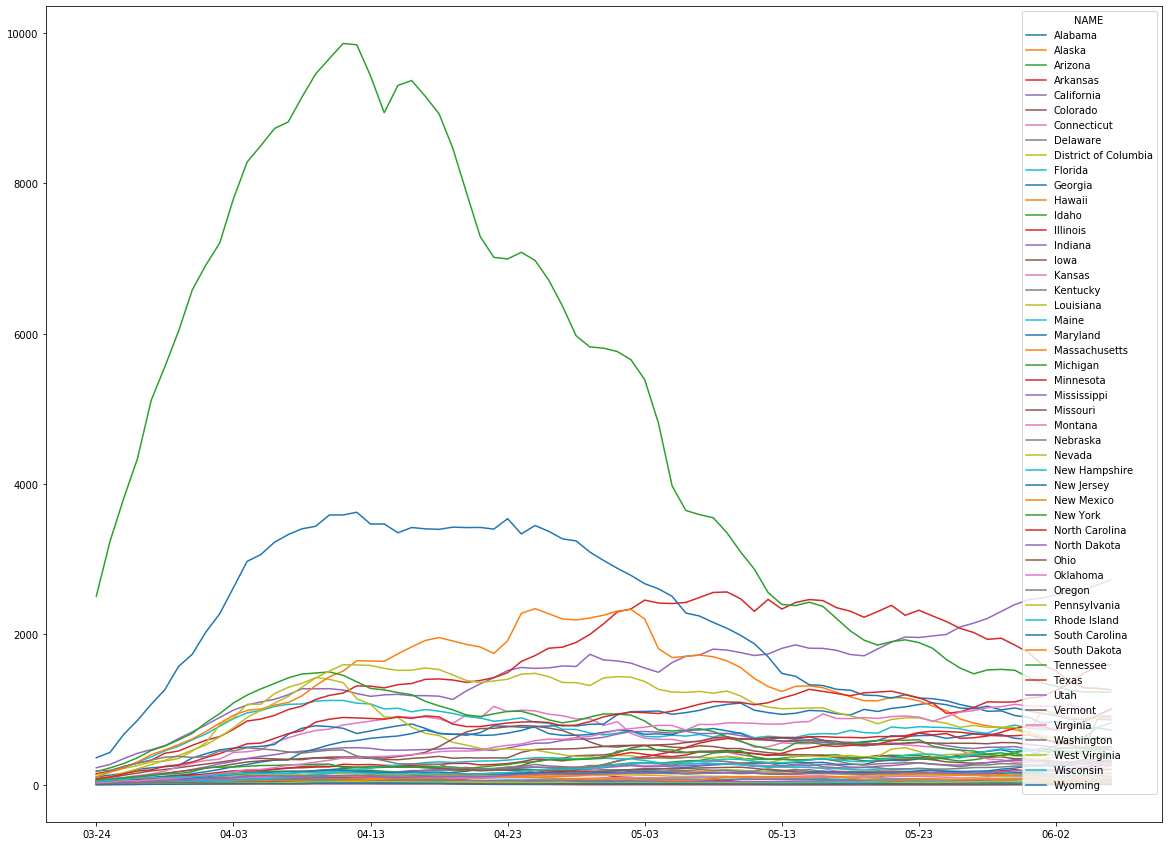

In [28]:
#smooth the dataset
tdf = df.copy().T
tdf=tdf.rolling(10).mean()
sm_df=tdf.T
sm_df=sm_df.dropna(axis=1,how='all')
display(sm_df.head())
sm_df.T.iloc[54:].plot(figsize=(20,15),legend=True)

In [36]:
#merge smoothed dataset with map
sm_coviddf = map_df.merge(sm_df,on='NAME')
sm_coviddf.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
0,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,...,657.6,650.3,652.1,665.1,620.4,566.4,529.9,496.0,502.2,503.8
1,20.853578,30.717392,84,83,53,Washington,01,4,9,None,...,230.4,236.3,248.3,251.0,272.7,284.9,276.8,271.7,298.9,292.1
2,0.001521,0.174360,85,84,53,Washington,01,4,9,None,...,230.4,236.3,248.3,251.0,272.7,284.9,276.8,271.7,298.9,292.1
3,0.002965,0.327859,89,88,53,Washington,01,4,9,None,...,230.4,236.3,248.3,251.0,272.7,284.9,276.8,271.7,298.9,292.1
4,0.001587,0.190426,90,89,53,Washington,01,4,9,None,...,230.4,236.3,248.3,251.0,272.7,284.9,276.8,271.7,298.9,292.1


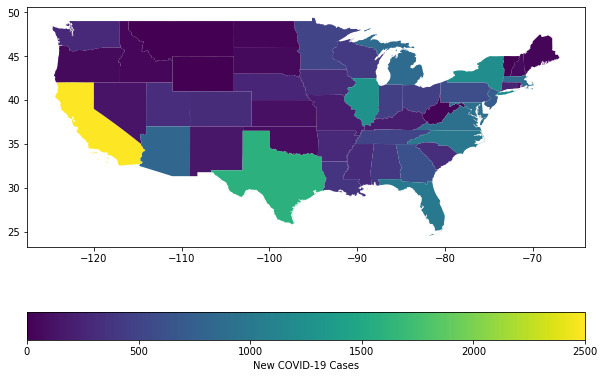

In [37]:
#test map
fig, ax = plt.subplots(1, 1,figsize=(10,8))
sm_coviddf.plot(column='06-06',
             ax=ax, 
             legend=True,
             vmin=0,
             vmax=2500,
             legend_kwds={'label': "New COVID-19 Cases",
                          'orientation': "horizontal"})

In [39]:
#create and save image for each day
dates=['01-21','01-22','01-23','01-24','01-25','01-26','01-27','01-28',
'01-29','01-30','01-31','02-01','02-02','02-03','02-04','02-05',
'02-06','02-07','02-08','02-09','02-10','02-11','02-12','02-13',
'02-14','02-15','02-16','02-17','02-18','02-19','02-20','02-21',
'02-22','02-23','02-24','02-25','02-26','02-27','02-28','02-29',
'03-01','03-02','03-03','03-04','03-05','03-06','03-07','03-08',
'03-09','03-10','03-11','03-12','03-13','03-14','03-15','03-16',
'03-17','03-18','03-19','03-20','03-21','03-22','03-23','03-24',
'03-25','03-26','03-27','03-28','03-29','03-30','03-31','04-01',
'04-02','04-03','04-04','04-05','04-06','04-07','04-08','04-09',
'04-10','04-11','04-12','04-13','04-14','04-15','04-16','04-17',
'04-18','04-19','04-20','04-21','04-22','04-23','04-24','04-25',
'04-26','04-27','04-28','04-29','04-30','05-01','05-02','05-03',
'05-04','05-05','05-06','05-07','05-08','05-09','05-10','05-11',
'05-12','05-13','05-14','05-15','05-16','05-17','05-18','05-19',
'05-20','05-21','05-22','05-23','05-24','05-25','05-26','05-27',
'05-28','05-29','05-30','05-31','06-01','06-02','06-03','06-04',
'06-05','06-06']

for date in dates[-sm_df.shape[1]:]:
    fig, ax = plt.subplots(1, 1,figsize=(10, 8))
    sm_coviddf.plot(column=date,
                 ax=ax,
                 legend=True,
                 vmin=0,
                 vmax=2500,
                 legend_kwds={'label': 'New COVID-19 Cases: {}'.format(date),
                              'orientation': "horizontal"})
    plt.savefig('img/sm_{} USA COVID Cases.png'.format(date))
    plt.close()
print('Done')

Done


In [89]:
#create gif
images = []

for date in dates[-sm_df.shape[1]:]:
    frame = Image.open('img/sm_{} USA COVID Cases.png'.format(date))
    images.append(frame)
    
for x in range(int(len(images)/8)):
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('USA-COVID-Cases_smoothed.gif',
               save_all=True,
               append_images=images[1:],
               duration=200,
               loop=0)

HTML('<img src="USA-COVID-Cases_smoothed.gif">')

## Per Capita

,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0,0,0.0,0.000000,0.000000,0,0,0,0.0,...,1.015666,1.021785,0.668953,1.209418,1.186984,0.483359,0.163159,0.450727,0.642440,1.337906
Alaska,0.0,0,0,0.0,0.000000,0.000000,0,0,0,0.0,...,0.177706,0.082018,0.068348,0.382752,0.095688,0.287064,0.259724,0.355412,0.314403,0.191376
Arizona,0.0,0,0,0.0,0.000000,0.001374,0,0,0,0.0,...,0.688308,0.964456,1.085356,0.935604,0.256913,1.548350,1.366999,0.787227,2.130870,1.577201
Arkansas,0.0,0,0,0.0,0.000000,0.000000,0,0,0,0.0,...,0.864861,0.791961,0.782020,0.795275,0.629593,1.242617,0.825098,1.186285,0.748884,1.491140
California,0.0,0,0,0.0,0.000253,0.000253,0,0,0,0.0,...,0.556030,0.752172,0.773685,0.762802,0.640055,0.617024,0.588679,0.635246,0.909339,0.667388


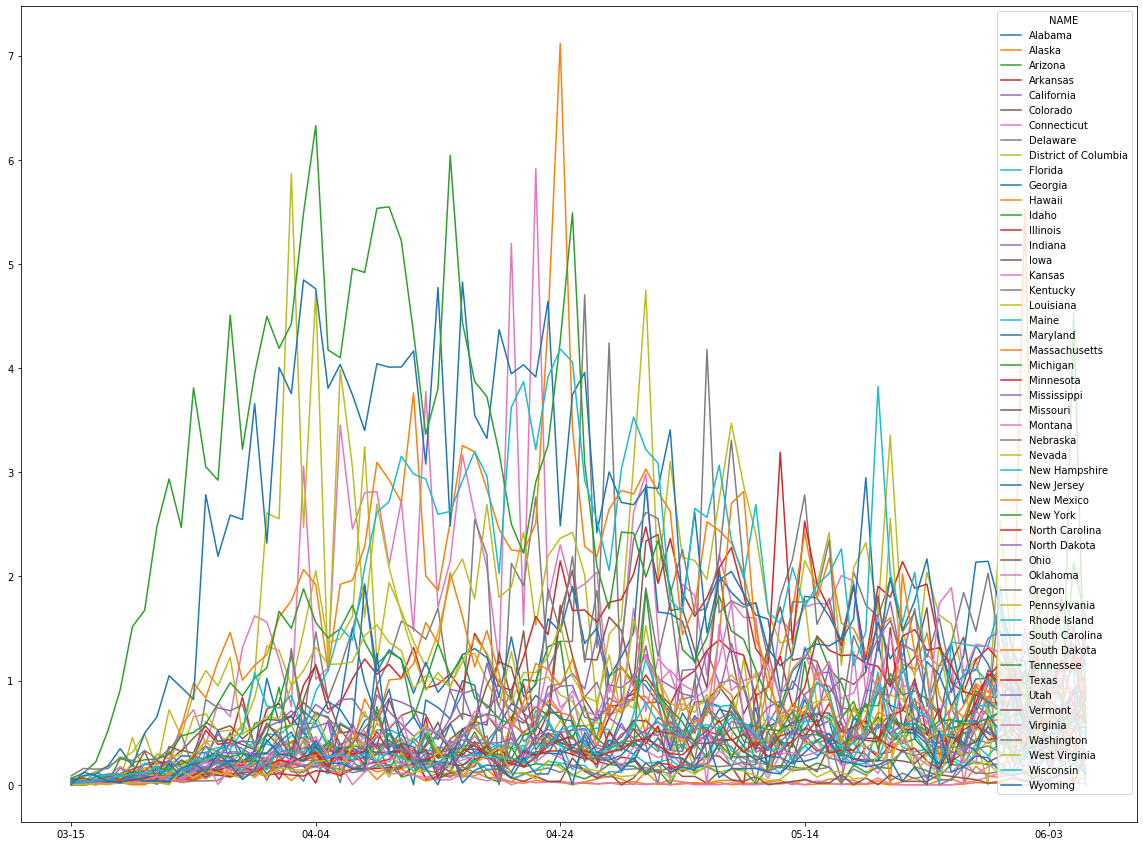

In [50]:
#Load dataset
pc_df = pd.read_excel('NYTimes data.xlsx',sheet_name='Sheet6')
pc_df=pc_df.set_index('NAME')
display(pc_df.head())
pc_df.T.iloc[54:].plot(figsize=(20,15),legend=True)

In [52]:
#merge map and covid dataset
pc_coviddf = map_df.merge(pc_df,on='NAME')
pc_coviddf.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
0,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,...,0.856439,1.035529,1.168516,1.170289,0.634793,0.531950,0.643659,0.714586,1.253628,0.923819
1,20.853578,30.717392,84,83,53,Washington,01,4,9,None,...,0.341436,0.372953,0.312545,0.257390,0.601453,0.439927,0.215367,0.291534,0.715703,0.287594
2,0.001521,0.174360,85,84,53,Washington,01,4,9,None,...,0.341436,0.372953,0.312545,0.257390,0.601453,0.439927,0.215367,0.291534,0.715703,0.287594
3,0.002965,0.327859,89,88,53,Washington,01,4,9,None,...,0.341436,0.372953,0.312545,0.257390,0.601453,0.439927,0.215367,0.291534,0.715703,0.287594
4,0.001587,0.190426,90,89,53,Washington,01,4,9,None,...,0.341436,0.372953,0.312545,0.257390,0.601453,0.439927,0.215367,0.291534,0.715703,0.287594


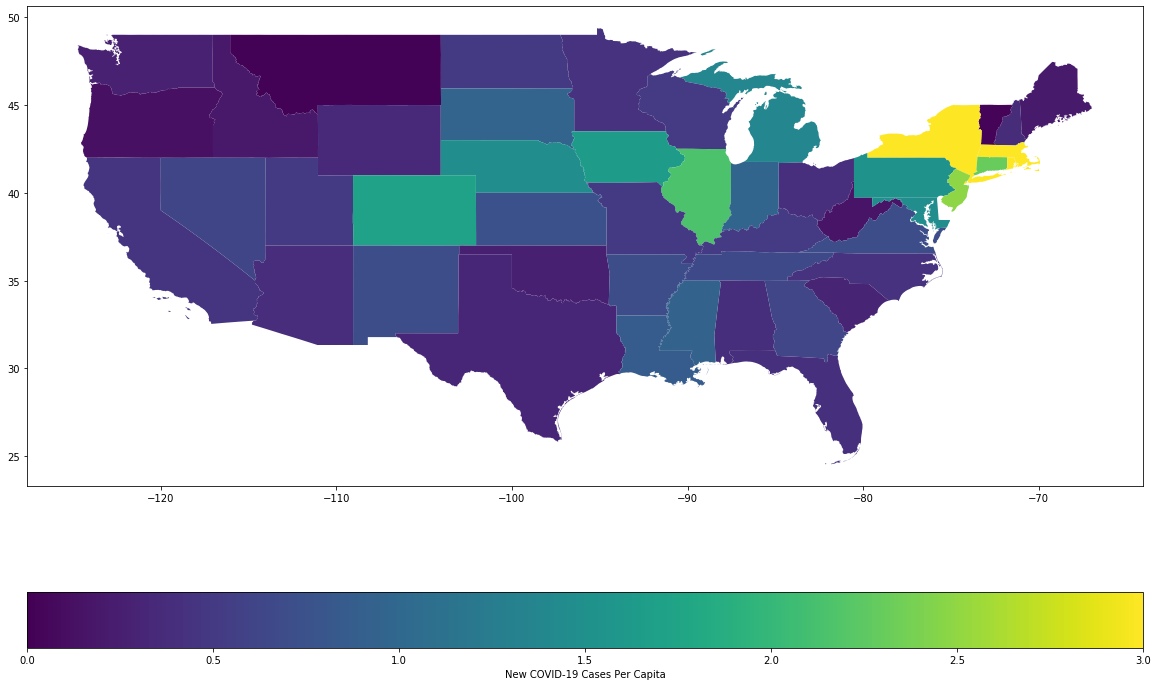

In [80]:
#practice map
fig, ax = plt.subplots(1, 1,figsize=(20, 13))
pc_coviddf.plot(column='04-24',
             ax=ax, 
             legend=True,
             vmin=0,
             vmax=3,
             legend_kwds={'label': "New COVID-19 Cases Per Capita",
                          'orientation': "horizontal"})

In [79]:
#create and save image for each day
dates=['01-21','01-22','01-23','01-24','01-25','01-26','01-27','01-28',
'01-29','01-30','01-31','02-01','02-02','02-03','02-04','02-05',
'02-06','02-07','02-08','02-09','02-10','02-11','02-12','02-13',
'02-14','02-15','02-16','02-17','02-18','02-19','02-20','02-21',
'02-22','02-23','02-24','02-25','02-26','02-27','02-28','02-29',
'03-01','03-02','03-03','03-04','03-05','03-06','03-07','03-08',
'03-09','03-10','03-11','03-12','03-13','03-14','03-15','03-16',
'03-17','03-18','03-19','03-20','03-21','03-22','03-23','03-24',
'03-25','03-26','03-27','03-28','03-29','03-30','03-31','04-01',
'04-02','04-03','04-04','04-05','04-06','04-07','04-08','04-09',
'04-10','04-11','04-12','04-13','04-14','04-15','04-16','04-17',
'04-18','04-19','04-20','04-21','04-22','04-23','04-24','04-25',
'04-26','04-27','04-28','04-29','04-30','05-01','05-02','05-03',
'05-04','05-05','05-06','05-07','05-08','05-09','05-10','05-11',
'05-12','05-13','05-14','05-15','05-16','05-17','05-18','05-19',
'05-20','05-21','05-22','05-23','05-24','05-25','05-26','05-27',
'05-28','05-29','05-30','05-31','06-01','06-02','06-03','06-04',
'06-05','06-06']

for date in dates:
    fig, ax = plt.subplots(1, 1,figsize=(10, 8))
    pc_coviddf.plot(column=date,
                 ax=ax,
                 legend=True,
                 vmin=0,
                 vmax=3,
                 legend_kwds={'label': 'New COVID-19 Cases Per Capita: {}'.format(date),
                              'orientation': "horizontal"})
    plt.savefig('img/pc_{} USA COVID Cases.png'.format(date))
    plt.close()
print('Done')

Done


In [90]:
#create gif
images = []

for date in dates[-sm_df.shape[1]:]:
    frame = Image.open('img/pc_{} USA COVID Cases.png'.format(date))
    images.append(frame)
    
for x in range(int(len(images)/8)):
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('USA-COVID-Cases_per-capita.gif',
               save_all=True,
               append_images=images[1:],
               duration=200,
               loop=0)

HTML('<img src="USA-COVID-Cases_per-capita.gif">')

## Per Capita Smoothed

,02-04,02-05,02-06,02-07,02-08,02-09,02-10,02-11,02-12,02-13,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.792682,0.806279,0.813893,0.853595,0.919538,0.908933,0.880380,0.818516,0.812125,0.866512
Alaska,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042832,0.044654,0.048300,0.070171,0.072905,0.089309,0.106624,0.127584,0.148544,0.159480
Arizona,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000000,0.000000,0.000000,0.000000,...,0.511720,0.530405,0.557424,0.577483,0.566583,0.648466,0.703329,0.725494,0.829267,0.907578
Arkansas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.508534,0.532613,0.563320,0.590933,0.592922,0.663834,0.694540,0.755953,0.705365,0.770754
California,0.000101,0.000101,0.000101,0.000101,0.000101,0.000084,0.000084,0.000084,0.000084,0.000084,...,0.520565,0.541537,0.558224,0.576716,0.595208,0.609735,0.614595,0.620770,0.641523,0.646990


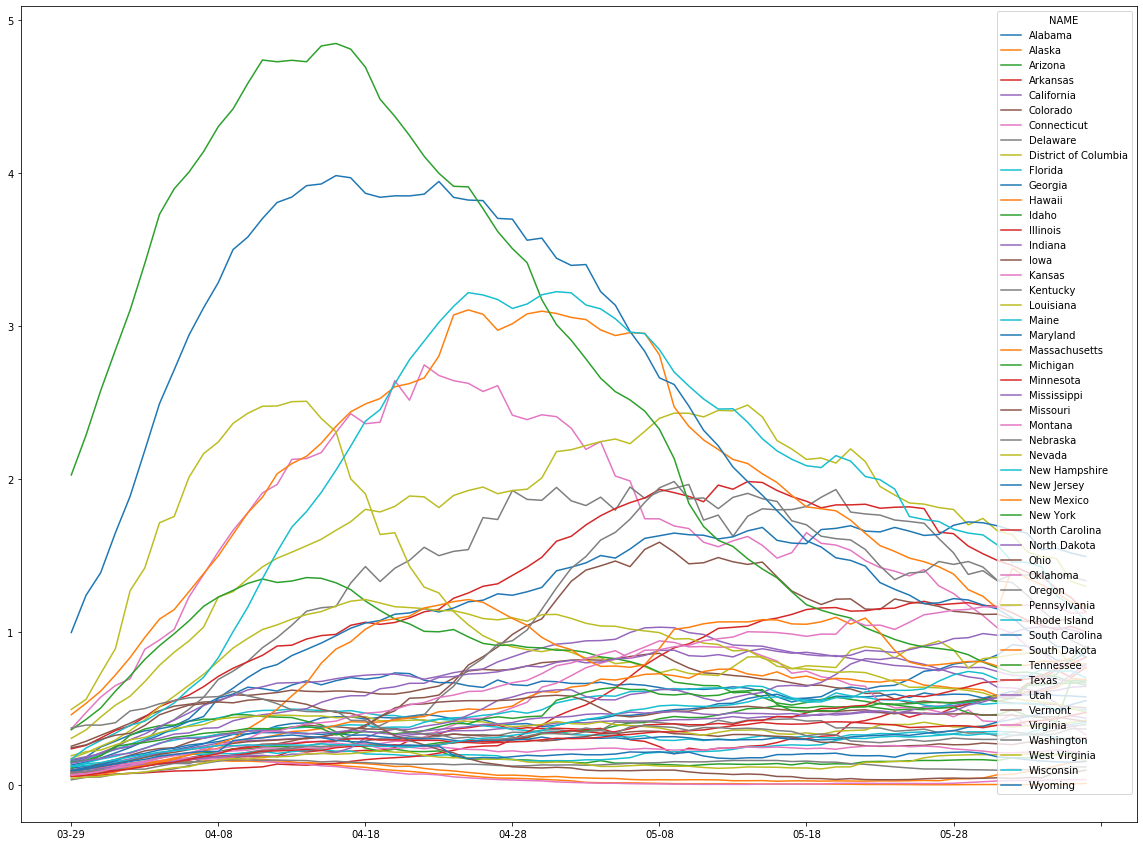

In [82]:
#smooth the dataset
tdf = pc_df.copy().T
tdf=tdf.rolling(15).mean()
smpc_df=tdf.T
smpc_df=smpc_df.dropna(axis=1,how='all')
display(smpc_df.head())
smpc_df.T.iloc[54:].plot(figsize=(20,15),legend=True)

In [83]:
#merge map and covid dataset
smpc_coviddf = map_df.merge(smpc_df,on='NAME')
smpc_coviddf.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,...,05-28,05-29,05-30,05-31,06-01,06-02,06-03,06-04,06-05,06-06
0,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,...,1.186957,1.193695,1.176318,1.168161,1.127851,1.080094,1.045340,1.017206,1.038129,1.004557
1,20.853578,30.717392,84,83,53,Washington,01,4,9,None,...,0.309744,0.302915,0.300639,0.300639,0.325678,0.333995,0.328654,0.337759,0.370677,0.368751
2,0.001521,0.174360,85,84,53,Washington,01,4,9,None,...,0.309744,0.302915,0.300639,0.300639,0.325678,0.333995,0.328654,0.337759,0.370677,0.368751
3,0.002965,0.327859,89,88,53,Washington,01,4,9,None,...,0.309744,0.302915,0.300639,0.300639,0.325678,0.333995,0.328654,0.337759,0.370677,0.368751
4,0.001587,0.190426,90,89,53,Washington,01,4,9,None,...,0.309744,0.302915,0.300639,0.300639,0.325678,0.333995,0.328654,0.337759,0.370677,0.368751


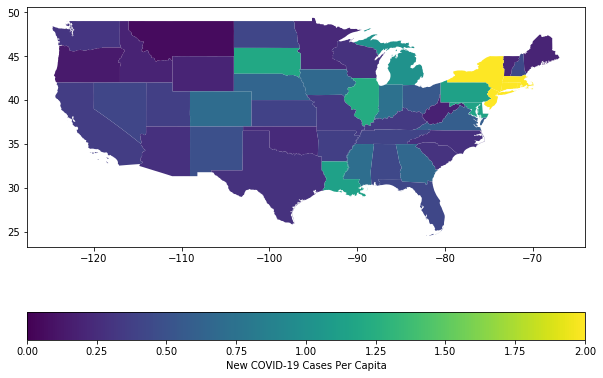

In [84]:
#practice map
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
smpc_coviddf.plot(column='04-24',
             ax=ax, 
             legend=True,
             vmin=0,
             vmax=2,
             legend_kwds={'label': "New COVID-19 Cases Per Capita",
                          'orientation': "horizontal"})

In [85]:
#create and save image for each day
dates=['01-21','01-22','01-23','01-24','01-25','01-26','01-27','01-28',
'01-29','01-30','01-31','02-01','02-02','02-03','02-04','02-05',
'02-06','02-07','02-08','02-09','02-10','02-11','02-12','02-13',
'02-14','02-15','02-16','02-17','02-18','02-19','02-20','02-21',
'02-22','02-23','02-24','02-25','02-26','02-27','02-28','02-29',
'03-01','03-02','03-03','03-04','03-05','03-06','03-07','03-08',
'03-09','03-10','03-11','03-12','03-13','03-14','03-15','03-16',
'03-17','03-18','03-19','03-20','03-21','03-22','03-23','03-24',
'03-25','03-26','03-27','03-28','03-29','03-30','03-31','04-01',
'04-02','04-03','04-04','04-05','04-06','04-07','04-08','04-09',
'04-10','04-11','04-12','04-13','04-14','04-15','04-16','04-17',
'04-18','04-19','04-20','04-21','04-22','04-23','04-24','04-25',
'04-26','04-27','04-28','04-29','04-30','05-01','05-02','05-03',
'05-04','05-05','05-06','05-07','05-08','05-09','05-10','05-11',
'05-12','05-13','05-14','05-15','05-16','05-17','05-18','05-19',
'05-20','05-21','05-22','05-23','05-24','05-25','05-26','05-27',
'05-28','05-29','05-30','05-31','06-01','06-02','06-03','06-04',
'06-05','06-06']

for date in dates[-smpc_df.shape[1]:]:
    fig, ax = plt.subplots(1, 1,figsize=(10, 8))
    smpc_coviddf.plot(column=date,
                 ax=ax,
                 legend=True,
                 vmin=0,
                 vmax=2,
                 legend_kwds={'label': 'New COVID-19 Cases Per Capita: {}'.format(date),
                              'orientation': "horizontal"})
    plt.savefig('img/smpc_{} USA COVID Cases.png'.format(date))
    plt.close()
print('Done')

Done


In [91]:
#create gif
images = []

for date in dates[-smpc_df.shape[1]:]:
    frame = Image.open('img/smpc_{} USA COVID Cases.png'.format(date))
    images.append(frame)
    
for x in range(int(len(images)/8)):
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('USA-COVID-Cases_per-capita-smoothed.gif',
               save_all=True,
               append_images=images[1:],
               duration=200,
               loop=0)

HTML('<img src="USA-COVID-Cases_per-capita-smoothed.gif">')